In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("data.csv")

In [20]:

data=data.dropna()
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
 def top_publishers(df_input,att,top_num):
    return df_input[[att,"Publisher"]]\
        .groupby("Publisher")\
        .sum()\
        .sort_values(att,ascending=False)[:top_num]
    

<AxesSubplot:xlabel='Publisher'>

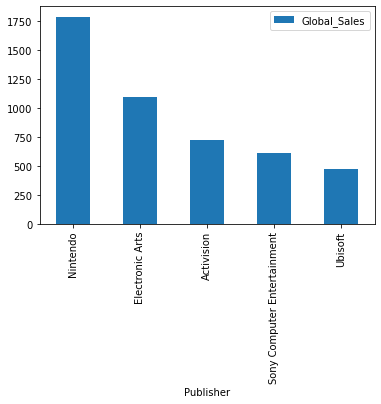

In [16]:
top5=top_publishers(data,"Global_Sales",5)
top5.plot.bar()

<AxesSubplot:>

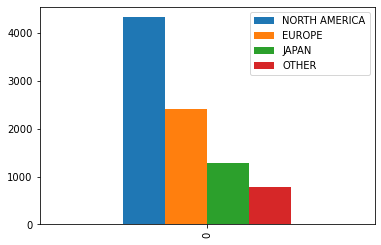

In [17]:
pd.DataFrame({"NORTH AMERICA":[data.NA_Sales.sum()],"EUROPE":[data.EU_Sales.sum()],"JAPAN":[data.JP_Sales.sum()],"OTHER":[data.Other_Sales.sum()]}).plot.bar()

In [18]:
from pandas.plotting import parallel_coordinates

<AxesSubplot:>

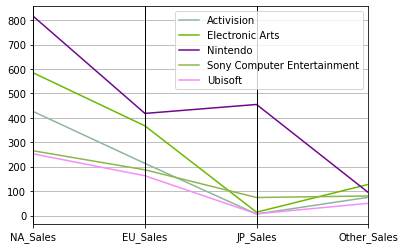

In [19]:
sales_data=data.loc[
    (data["Publisher"].isin(list(top5.reset_index()["Publisher"])))]\
    .groupby("Publisher")\
    .sum()
parallel_coordinates(\
                     sales_data[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]\
                     .reset_index(),"Publisher")
